In [69]:
import sys
import os
import numpy as np
import pandas as pd

# Путь к директории, в которой находится этот файл
# Чтобы можно импортировать папки с кодом из директории выше
# например from censure import Censor
current_directory = os.path.dirname(os.path.abspath(''))
parent_directory = os.path.abspath(os.path.join(current_directory, '..'))
sys.path.append(current_directory)

In [4]:
from scripts.profanity_check import profanity_processing
from scripts.embedding_model import universal_sentence_encoder
from scripts.clasterer import Clasterer

/home/drozdovmk/anaconda3/envs/text_cluster_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
import pandas as pd
# csv_file = 'Answers.csv'
# data = pd.read_csv(csv_file).iloc[1:,0].reset_index(drop=True).to_list()
csv_file = '../data/motivations.csv'
with open(csv_file, 'r', encoding='utf-8') as file:
    data = file.readlines()
    data = [line.strip().replace('"', '').replace("'", '') for line in data]

In [6]:
import sys
import os
import numpy as np
import pandas as pd

# Путь к директории, в которой находится этот файл
# Чтобы можно импортировать папки с кодом из директории выше
# например from censure import Censor
current_directory = os.path.dirname(os.path.abspath(''))
parent_directory = os.path.abspath(os.path.join(current_directory, '..'))
sys.path.append(current_directory)

# from scripts.embedding_model import RuBertEmbedder, universal_sentence_encoder
# rb = RuBertEmbedder()
# embeddings = rb.transform(data)

import tensorflow_hub as hub
import tensorflow_text
use = universal_sentence_encoder()
embeddings = use.transform(data).numpy()


In [13]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture

pca = TruncatedSVD(n_components=2)
embeddings_reduced = pca.fit_transform(embeddings)

In [14]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
km.fit(embeddings_reduced)

KMeans(n_clusters=2)

[-0.39984345  0.19779468] [0.2662484  0.20348941] 128.85898
[-0.33832982 -0.21722445] [0.3620499 0.2120277] 46.484108


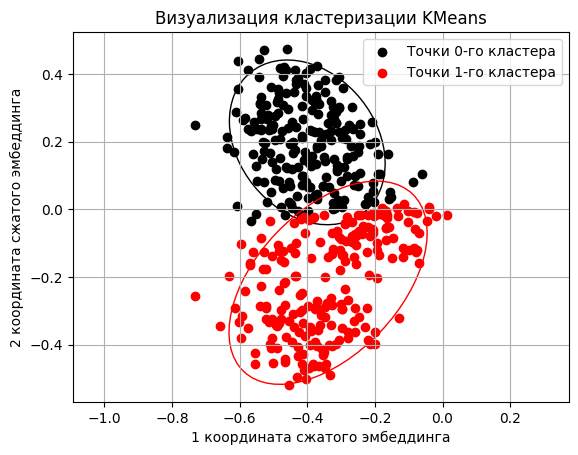

In [15]:
fig, ax = plt.subplots()
c = ['black', 'red']
for i in range(len(km.cluster_centers_)):
    # Преобразование входных данных в numpy массив
    labels = km.labels_
    points = np.array(embeddings_reduced[km.labels_ == i])
    # Находим центр массива точек
    center = np.mean(points, axis=0)
    # Выполняем анализ главных компонент
    pca = PCA(n_components=2)
    pca.fit(points)
    
    # Достаем собственные вектора и собственные значения
    eigenvectors = pca.components_
    eigenvalues = pca.explained_variance_
    
    # Масштабируем собственные значения, чтобы они соответствовали заданному уровню охвата (например, 2 стандартных отклонения)
    scale_factor = np.sqrt(eigenvalues) * 2
    
    # Построение эллипса
    ellipse = plt.matplotlib.patches.Ellipse(
        xy=center,
        width=scale_factor[0] * 2,
        height=scale_factor[1] * 2,
        angle=np.degrees(np.arctan2(*eigenvectors[0][::-1])),
        edgecolor=c[i],
        facecolor='none',
    )
    
    # Создаем график
    print(center, scale_factor, np.degrees(np.arctan2(*eigenvectors[0][::-1])))
    ax.scatter(embeddings_reduced[km.labels_ == i][:, 0], embeddings_reduced[km.labels_ == i][:, 1],
               label='Точки {}-го кластера'.format(i), color = c[i])
    ax.add_patch(ellipse)
    # ax.scatter(embeddings_reduced[km.labels_ == i][:, 0], embeddings_reduced[km.labels_ == i][:, 1], c = 'red')
    ax.set_xlabel('1 координата сжатого эмбеддинга')
    ax.set_ylabel('2 координата сжатого эмбеддинга')
    ax.set_title('Визуализация кластеризации KMeans')
    ax.legend()
    ax.grid(True)
    ax.axis('equal')

In [46]:
import os
os.listdir('../data')

['Answers.csv', 'motivations.csv']

In [2]:
with open('../data/motivations.csv', 'r', encoding='utf-8') as file:
    lines = file.readlines()
    lines = [line.strip().replace('"', '').replace("'", '') for line in lines]

In [5]:

from collections import Counter
words = ["apple", "banana", "apple", "orange", "banana", "kiwi", "orange", "apple"]

# Подсчет количества слов
word_count = Counter(words)

# Форматируем вывод
result = [(word, count) for word, count in word_count.items()]
result

[('apple', 3), ('banana', 2), ('orange', 2), ('kiwi', 1)]